In [1]:
import numpy as np
import pandas as  pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [2]:
air =pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
air 

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
def range_x(x):
    return (np.min(x),np.max(x))
for i in range(1,air.shape[1]):
    print(air.columns[i],range_x(air.iloc[:,i]))

Balance (0, 1704838)
Qual_miles (0, 11148)
cc1_miles (1, 5)
cc2_miles (1, 3)
cc3_miles (1, 5)
Bonus_miles (0, 263685)
Bonus_trans (0, 86)
Flight_miles_12mo (0, 30817)
Flight_trans_12 (0, 53)
Days_since_enroll (2, 8296)
Award? (0, 1)


In [4]:
#we can see that cc1_miles,cc2_miles,cc3_miles,have very less variance so they provide very little information so dropping those
#also ID# doesn't have any significance so dropping that also
#Award? is categorical so dropping that also

In [5]:
air1=air.drop(columns=['cc1_miles', 'cc2_miles', 'cc3_miles','ID#','Award?'],axis=1)
air1.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935


In [6]:
sc_x=StandardScaler()
x=sc_x.fit_transform(air1.values)
x

array([[-4.51140783e-01, -1.86298687e-01, -7.02786266e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.01088399e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -5.39252702e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  3.43803696e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -6.89286154e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.09991847e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

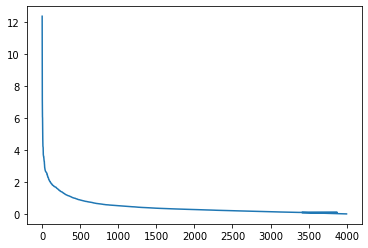

In [7]:
from sklearn.neighbors import NearestNeighbors
ns = 3
nbrs = NearestNeighbors(n_neighbors=ns).fit(x)
distances, indices = nbrs.kneighbors(x)
distanceDec = sorted(distances[:,ns-1], reverse=True)
plt.plot(indices[:,0], distanceDec)

In [8]:
print(distances)

[[0.         0.11184685 0.12034246]
 [0.         0.11406276 0.11437601]
 [0.         0.16540223 0.18885387]
 ...
 [0.         0.16614779 0.25857783]
 [0.         0.25725534 0.27167409]
 [0.         0.00270574 0.0112955 ]]


In [24]:
#building model
model=DBSCAN(eps=.5,min_samples=5)
model.fit(x)
air['cluster']= model.labels_

In [25]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [26]:
core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
labels = model.labels_

In [27]:
air.cluster.value_counts()

 0    2927
-1    1058
 3       5
 2       5
 1       4
Name: cluster, dtype: int64

In [28]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 1058


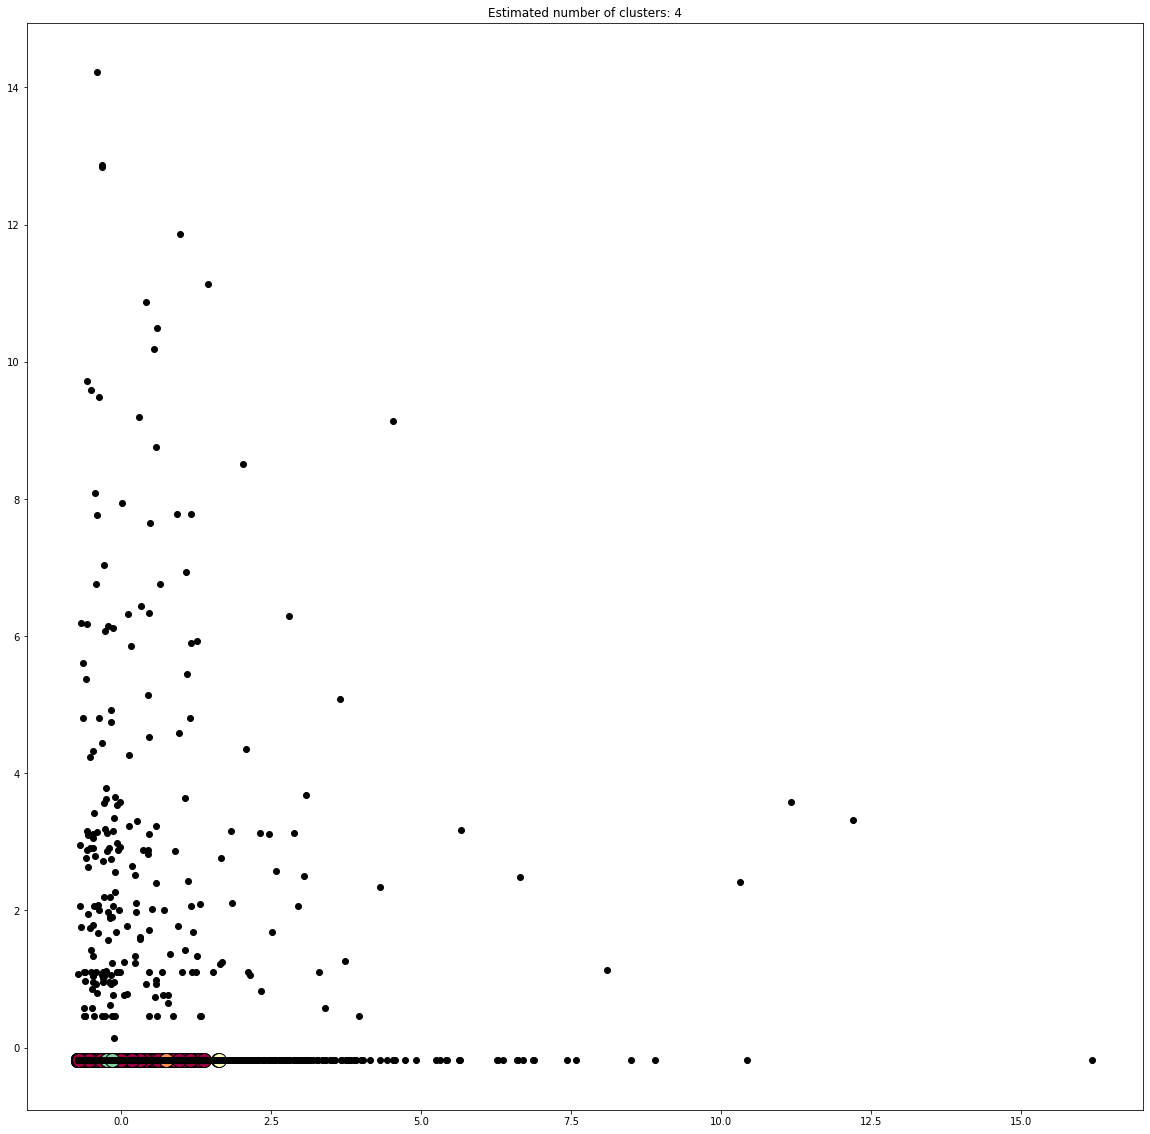

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20 ))
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [30]:
# as outliers are about 40% of total data points so tuining our model
model_1 =DBSCAN(eps=.6,min_samples=4)
model_1.fit(x)
air['clusters']=model_1.labels_

In [31]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [32]:
core_samples_mask_1 = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask_1[model.core_sample_indices_] = True
labels_1 = model_1.labels_

In [33]:
air.clusters.value_counts()

 0    3181
-1     792
 5       5
 3       5
 4       5
 1       4
 2       4
 6       3
Name: clusters, dtype: int64

In [34]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_1 = len(set(labels_1)) - (1 if -1 in labels_1 else 0)
n_noise_1 = list(labels_1).count(-1)

print('Estimated number of clusters: %d' % n_clusters_1)
print('Estimated number of noise points: %d' % n_noise_1)

Estimated number of clusters: 7
Estimated number of noise points: 792


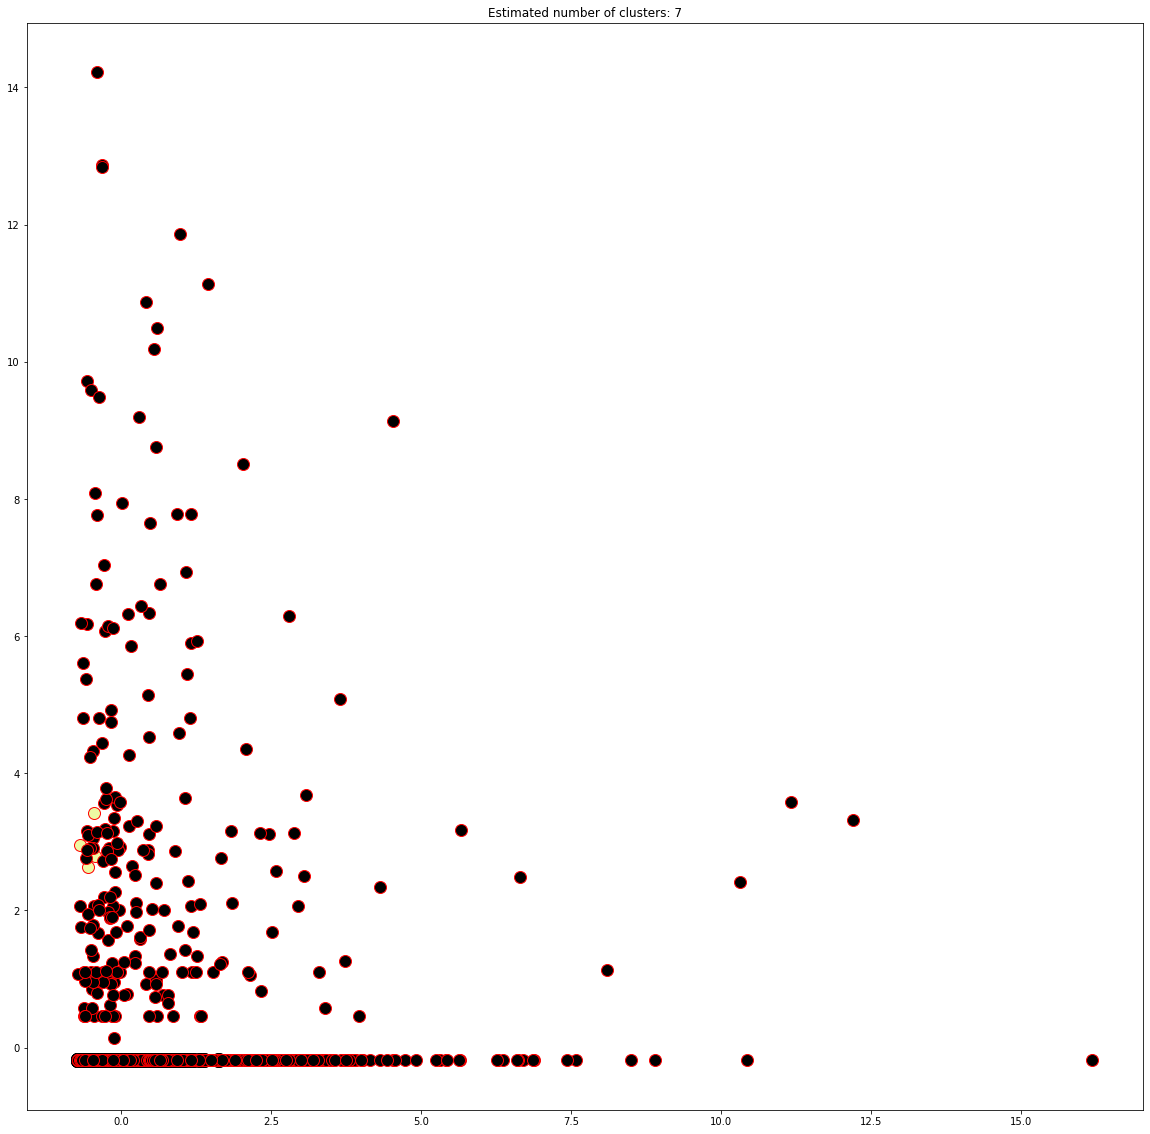

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20 ))
# Black removed and is used for noise instead.
unique_labels = set(labels_1)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels_1 == k)

    xy = x[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='red', markersize=12)

plt.title('Estimated number of clusters: %d' % n_clusters_1)
plt.show()